In [1]:
#!pip install -U scikit-learn
#!pip show scikit-learn

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [189]:
#dados = pd.read_csv("https://raw.githubusercontent.com/diegonogare/MachineLearning/main/alimentos.csv", sep=';')
dados = pd.read_csv("https://raw.githubusercontent.com/diegonogare/MachineLearning/main/alimentos2.csv", sep=';')

In [190]:
dados.describe()

,Lipídeos,Ferro
count,31.000000,31.000000
mean,10.497742,1.485484
std,12.005444,1.476317
min,0.000000,0.000000
25%,0.750000,0.300000
50%,3.700000,1.000000
75%,18.250000,2.400000
max,34.200000,5.700000


In [191]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Descrição dos alimentos  31 non-null     object 
 1   Lipídeos                 31 non-null     float64
 2   Ferro                    31 non-null     float64
dtypes: float64(2), object(1)
memory usage: 872.0+ bytes


In [192]:
dados.head()

,Descrição dos alimentos,Lipídeos,Ferro
0,Queijo. minas. frescal,20.2,0.9
1,Queijo. minas. meia cura,24.6,0.2
2,Queijo. mozarela,25.2,0.3
3,Queijo. parmesão,33.5,0.5
4,Queijo. pasteurizado,27.4,0.3


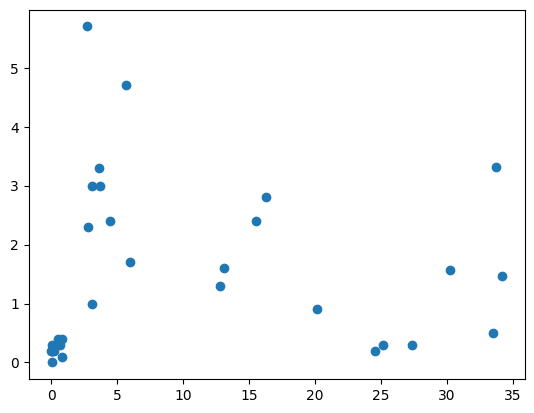

In [193]:
#plt.figure(figsize=(15,8))
plt.scatter(dados['Lipídeos'],dados['Ferro'])

In [198]:
#cluster = KMeans(n_clusters=4).fit(dados[['Lipídeos','Ferro']])
cluster = KMeans(n_clusters=5).fit(dados[['Lipídeos','Ferro']])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [199]:
print(cluster)
print(cluster.labels_)
print(cluster.cluster_centers_)

KMeans(n_clusters=5)
[4 4 4 1 4 2 2 2 2 0 0 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 1 1 1]
[[ 3.91111111  3.01111111]
 [32.9325      1.7125    ]
 [14.425       2.025     ]
 [ 0.34        0.23      ]
 [24.35        0.425     ]]


In [200]:
dados2=dados
dados2['clusters'] = cluster.labels_

print(dados2)


                              Descrição dos alimentos  Lipídeos  Ferro  \
0                              Queijo. minas. frescal     20.20   0.90   
1                            Queijo. minas. meia cura     24.60   0.20   
2                                    Queijo. mozarela     25.20   0.30   
3                                    Queijo. parmesão     33.50   0.50   
4                                Queijo. pasteurizado     27.40   0.30   
5          Carne. bovina. contra-filé de costela. cru     13.10   1.60   
6     Carne. bovina. contra-filé de costela. grelhado     16.30   2.80   
7        Carne. bovina. contra-filé. com gordura. cru     12.80   1.30   
8   Carne. bovina. contra-filé. com gordura. grelhado     15.50   2.40   
9        Carne. bovina. contra-filé. sem gordura. cru      6.00   1.70   
10  Carne. bovina. contra-filé. sem gordura. grelhado      4.50   2.40   
11                          Abóbora. cabotian. cozida      0.70   0.30   
12                            Abóbora.

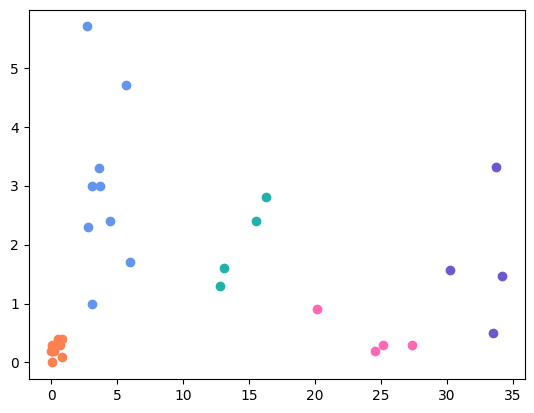

In [204]:
cores = {0:'cornflowerblue',1:'slateblue',2:'lightseagreen',3:'coral',4:'hotpink'}

for grupo in dados2['clusters'].unique():
    tmp = dados2[dados2['clusters'] == grupo]
    plt.scatter(tmp['Lipídeos'], tmp['Ferro'], color=cores[grupo] )


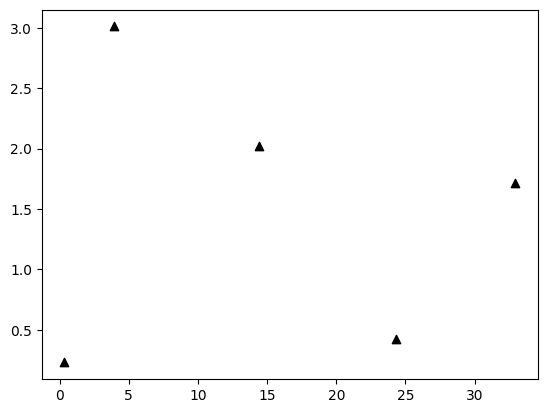

In [205]:
plt.scatter(cluster.cluster_centers_[:, 0], cluster.cluster_centers_[:, 1], color='black', marker='^')


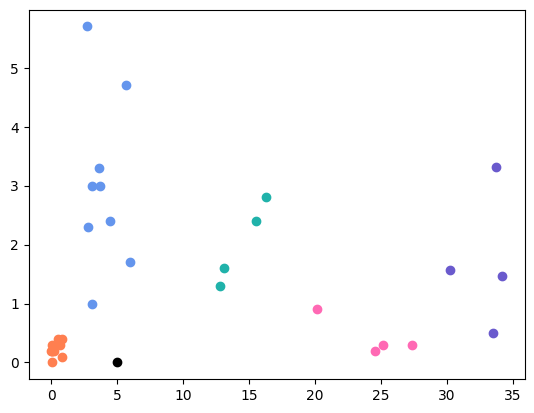

In [206]:
Novo_Dado_Lipideo = [5]
Novo_Dado_Ferro = [0]
Novo_Dado = {'Lipideo':Novo_Dado_Lipideo, 'Ferro':Novo_Dado_Ferro }
df = pd.DataFrame(Novo_Dado)

for grupo in dados2['clusters'].unique():
    tmp = dados2[dados2['clusters'] == grupo]
    plt.scatter(tmp['Lipídeos'], tmp['Ferro'], color=cores[grupo] )

plt.scatter(df['Lipideo'], df['Ferro'], c='black')

In [207]:
novo_valor = cluster.predict( [ df.iloc[0] ])


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [208]:
valor_Transform = cluster.transform([ df.iloc[0][0:2] ])
#df.iloc[0][0:2]
print(valor_Transform)

[[ 3.20194771 27.98494618  9.64008558  4.66567251 19.35466675]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [209]:
print(novo_valor)

[0]


In [210]:
df['clusters'] = novo_valor

print(df)

   Lipideo  Ferro  clusters
0        5      0         0


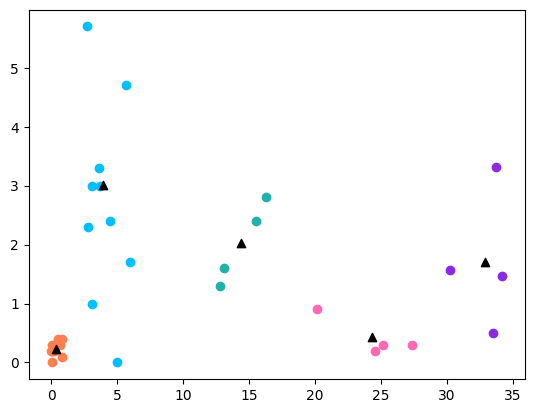

In [211]:
cores = {0:'deepskyblue',1:'blueviolet',2:'lightseagreen',3:'coral',4:'hotpink'}
for grupo in dados2['clusters'].unique():
    tmp = dados2[dados2['clusters'] == grupo]
    plt.scatter(tmp['Lipídeos'], tmp['Ferro'], color=cores[grupo] )

plt.scatter(df['Lipideo'], df['Ferro'], color=cores[df.iloc[0]['clusters']])

plt.scatter(cluster.cluster_centers_[:, 0], cluster.cluster_centers_[:, 1], color='black', marker='^')

